In [2]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz as gp
from sklearn import decomposition as PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import preprocessing
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import statistics

In [3]:
customer_personality_unscaled = pd.read_csv('customer-personality.csv')
customer_personality_unscaled['Dt_Customer'] = [(datetime.strptime(x, '%d-%m-%Y')-datetime.strptime('01-01-1900', '%d-%m-%Y')).days for x in customer_personality_unscaled['Dt_Customer']]
customer_personality_unscaled = customer_personality_unscaled.dropna()

customer_personality_unscaled = customer_personality_unscaled.drop("ID",axis =1)

customer_personality_unscaled["Age"] = 2022-customer_personality_unscaled["Year_Birth"]

customer_personality_unscaled["Total_Children"] = customer_personality_unscaled["Kidhome"] +customer_personality_unscaled["Teenhome"]

customer_personality_unscaled["Total_Spent_Products"] = customer_personality_unscaled["MntWines"] + customer_personality_unscaled["MntFruits"] + customer_personality_unscaled["MntMeatProducts"] + customer_personality_unscaled["MntFishProducts"] + customer_personality_unscaled["MntSweetProducts"] + customer_personality_unscaled["MntGoldProds"]

customer_personality_unscaled["Total_Purchases"] = customer_personality_unscaled["NumDealsPurchases"] + customer_personality_unscaled["NumWebPurchases"] + customer_personality_unscaled["NumCatalogPurchases"] + customer_personality_unscaled["NumStorePurchases"]

customer_personality_unscaled["Marital_Status_Size"] = customer_personality_unscaled["Marital_Status"].replace({"Married": 2, "Together": 2, "Absurd": 1, "Widow": 1, "YOLO": 1, "Divorced": 1, "Single": 1, "Alone": 1})

customer_personality_unscaled["FamilySize"] = customer_personality_unscaled["Marital_Status_Size"] + customer_personality_unscaled["Total_Children"]

customer_personality_unscaled = pd.get_dummies(customer_personality_unscaled)

scaler = MinMaxScaler()
scaler.fit(customer_personality_unscaled)
customer_personality = pd.DataFrame(scaler.transform(customer_personality_unscaled), columns=customer_personality_unscaled.columns)


In [4]:
customer_personality_unscaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.0,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.00,2.0
Dt_Customer,2216.0,41463.478791,202.434667,41118.0,41288.0,41461.5,41637.00,41817.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0


/var/folders/cw/n2nls3ts67q_tsjfyl0q_vtr0000gn/T/ipykernel_27647/3267290757.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(matrix, dtype=np.bool))


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5]),
 [Text(0, 0.5, 'Income'),
  Text(0, 1.5, 'Kidhome'),
  Text(0, 2.5, 'Teenhome'),
  Text(0, 3.5, 'Dt_Customer'),
  Text(0, 4.5, 'Recency'),
  Text(0, 5.5, 'MntWines'),
  Text(0, 6.5, 'MntFruits'),
  Text(0, 7.5, 'MntMeatProducts'),
  Text(0, 8.5, 'MntFishProducts'),
  Text(0, 9.5, 'MntSweetProducts'),
  Text(0, 10.5, 'MntGoldProds'),
  Text(0, 11.5, 'NumDealsPurchases'),
  Text(0, 12.5, 'NumWebPurchases'),
  Text(0, 13.5, 'NumCatalogPurchases'),
  Text(0, 14.5, 'NumStorePurchases'),
  Text(0, 15.5, 'NumWebVisitsMonth'),
  Text(0, 16.5, 'Age'),
  Text(0, 17.5, 'Total_Children'),
  Text(0, 18.5, 'Total_Spent_Products'),
  Text(0, 19.5, 'Total_Purchases'),
  Text(0, 20.5, 'Marital_Status_Size'),
  Text(0, 21.5, 'FamilySize'),
  Text(0, 22.5, 'Educati

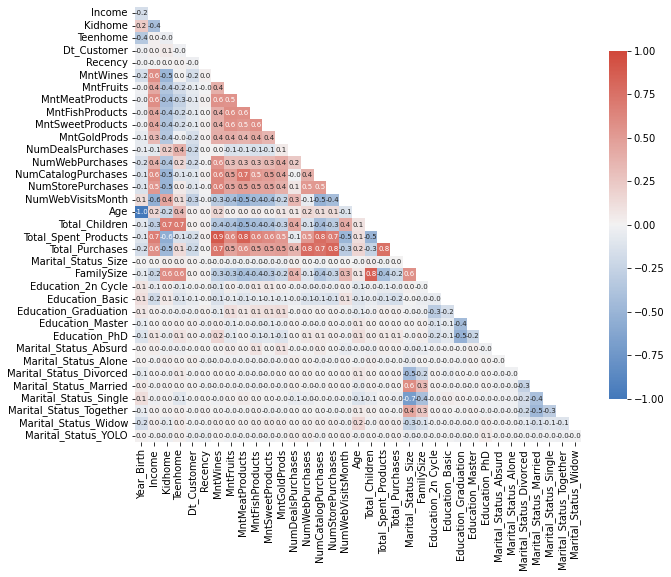

In [5]:
matrix = customer_personality.corr()

fig, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(np.ones_like(matrix, dtype=np.bool))
cmap1 = sns.diverging_palette(250, 15, l=50, center="light", as_cmap=True)

mask = mask[1:, :-1]
corr = matrix.iloc[1:, :-1].copy()
sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", vmin=-1,
            vmax=1, cbar_kws={"shrink": .8}, annot_kws={"size": 7}, cmap=cmap1)  # vlag, coolwarm
plt.yticks(rotation=0)
# plt.show()


In [6]:
var = customer_personality_unscaled.var()

In [7]:
var = pd.DataFrame(var)
var["Features"] = var.index
var.columns = ["Variance","Features"]
var = var.reset_index(drop = True)
var

,Variance,Features
0,1.436535e+02,Year_Birth
1,6.336838e+08,Income
2,2.882576e-01,Kidhome
3,2.961332e-01,Teenhome
4,4.097979e+04,Dt_Customer
5,8.380071e+02,Recency
6,1.137901e+05,MntWines
7,1.583556e+03,MntFruits
8,5.030299e+04,MntMeatProducts
9,2.997791e+03,MntFishProducts


Text(0, 0.5, 'Variance')

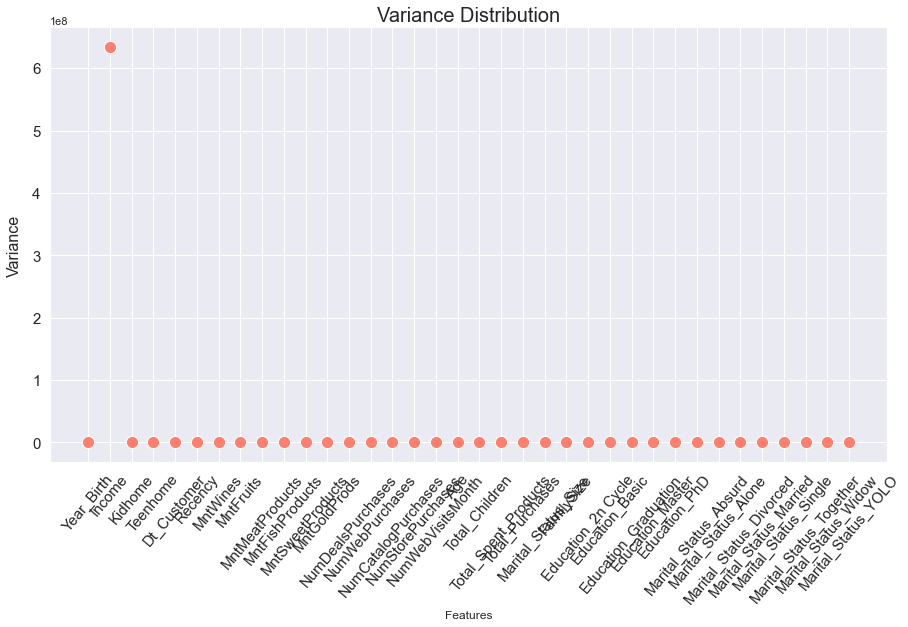

In [8]:
sns.set_style("white")
sns.set(rc={'figure.figsize': (15, 8), 'figure.facecolor': 'white'})
ax = sns.scatterplot(x="Features", y="Variance", data=var,color="salmon", s = 150)
plt.title("Variance Distribution", size=20)
plt.xticks(size=15,rotation = 50)
plt.yticks(size=15)
plt.xlabel("Features")
plt.ylabel("Variance", size=16, labelpad=10)


In [9]:
def feat_histo(x):
    if x.dtype == "int64" or x.dtype == "float64":
        size_bins = 20
        title = x.name
        color_bar = list(map(float, np.random.rand(4,)))
        sns.displot(x, bins=size_bins, kde = True, color = "Black",line_kws={"linewidth": 1.5,"alpha": 1},facecolor=color_bar,alpha = 0.2,height = 5,aspect = 1.5)
        plt.xticks(size=10)
        plt.yticks(size=10)
        plt.ylabel("Frequency", size=15, labelpad=15)
        plt.title(title, size=16)
    else:
        x = pd.DataFrame(x)
        sns.catplot(x=x.columns[0], kind="count", palette="Set2", data=x,aspect=.8,height = 5)
        title = x.columns[0]
        plt.title(title, size=14)
        plt.xticks(size=10)
        plt.yticks(size=10)
        plt.xlabel("")
        plt.ylabel("Count", size=16, labelpad=15)



/Users/az/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


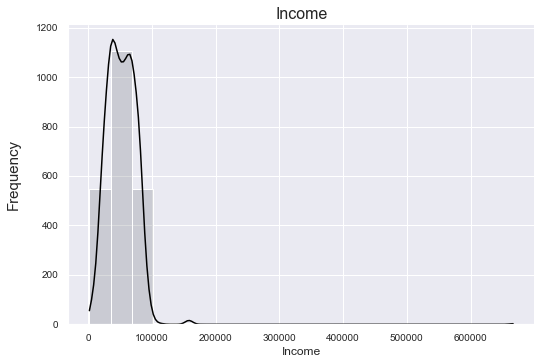

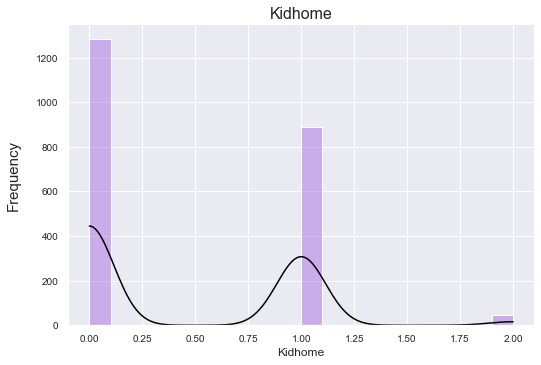

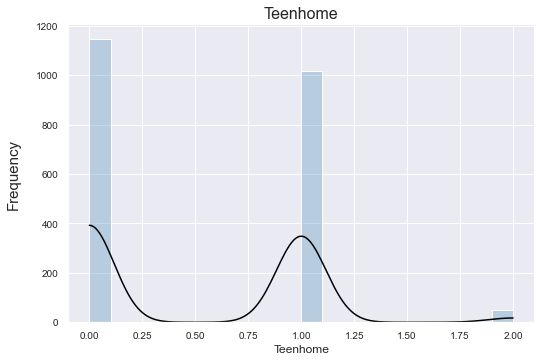

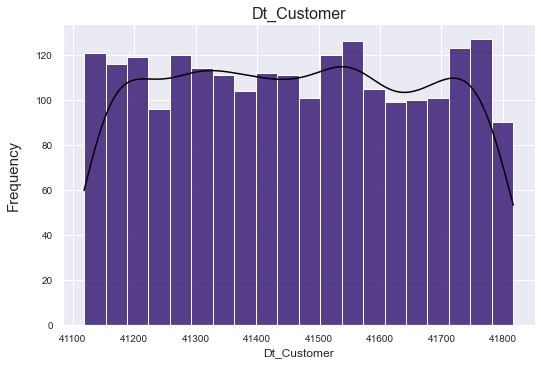

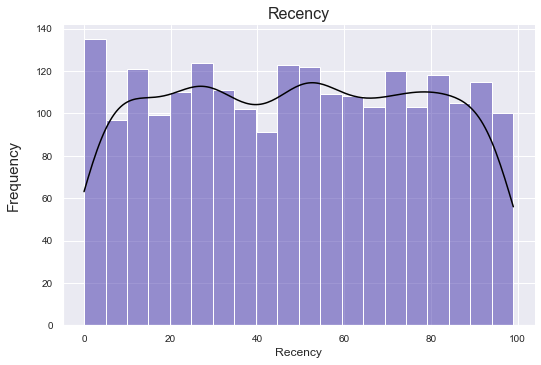

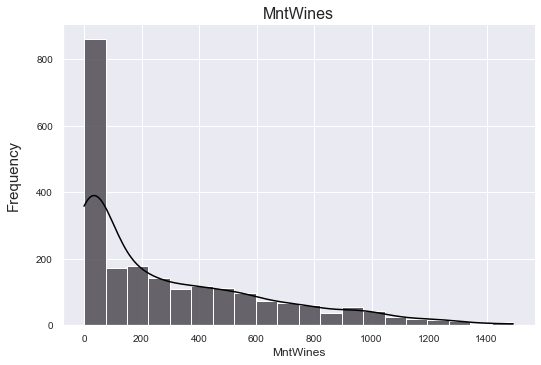

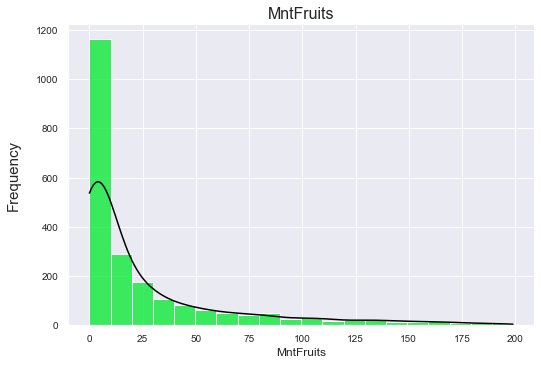

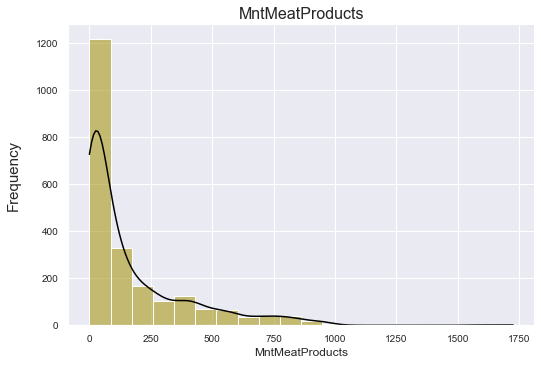

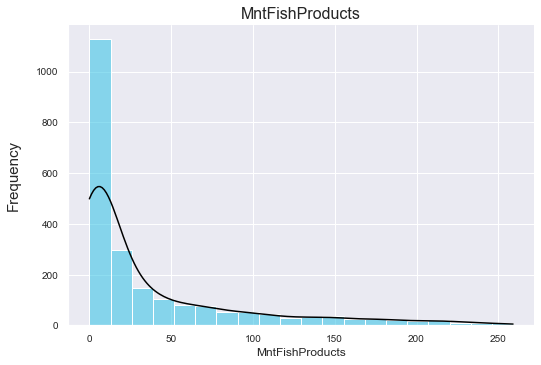

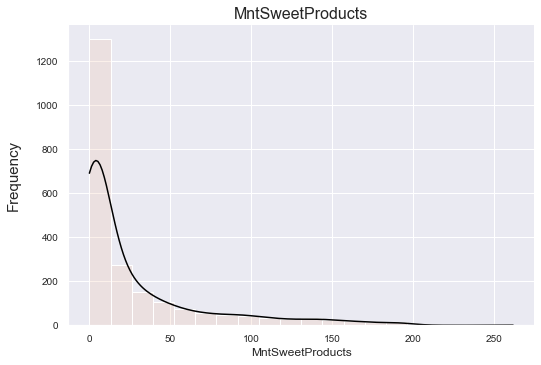

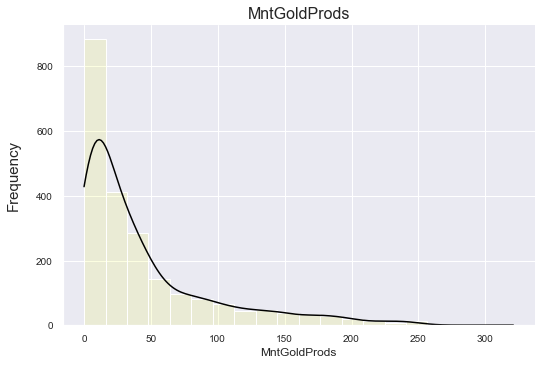

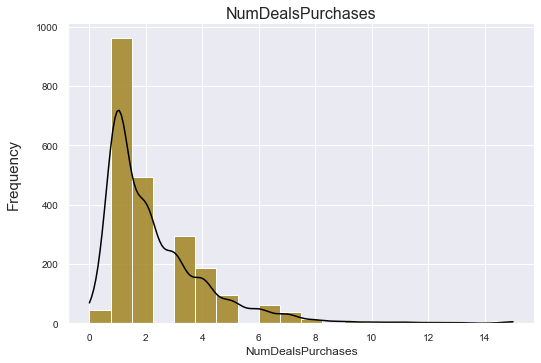

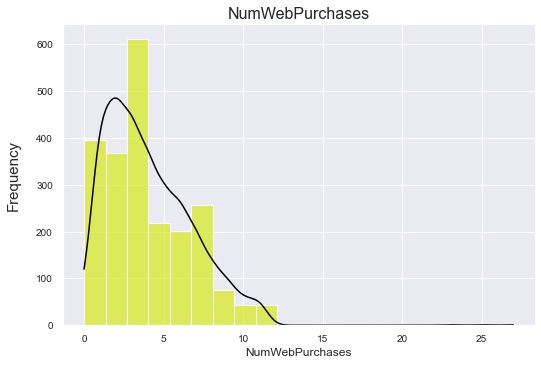

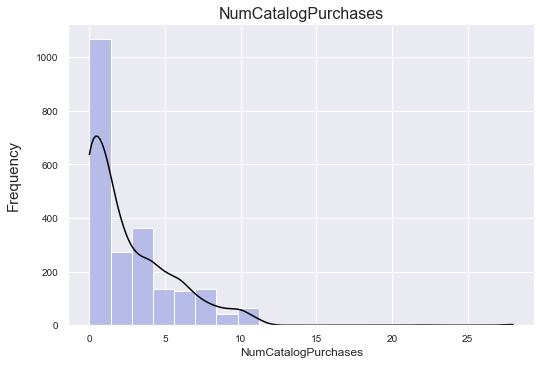

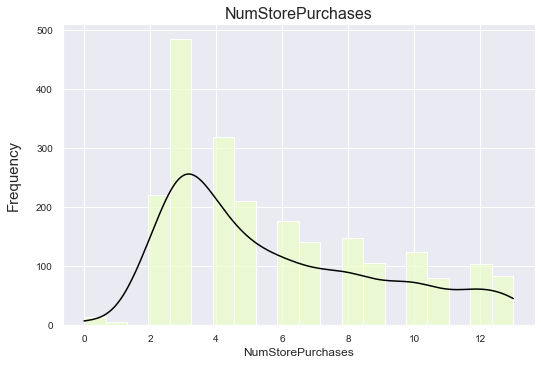

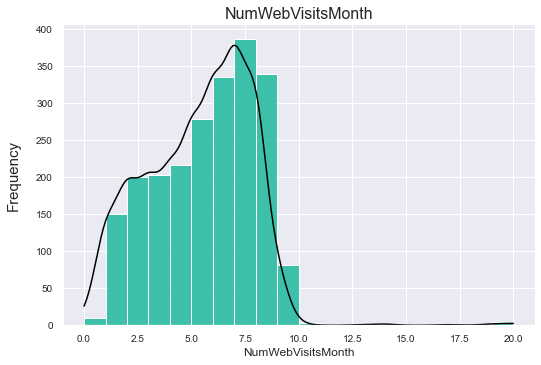

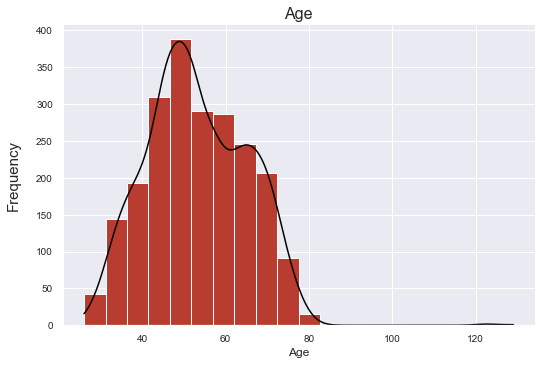

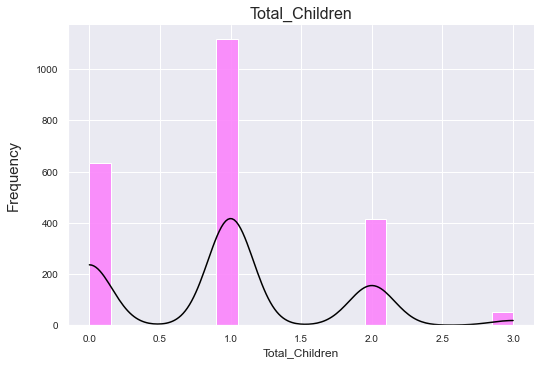

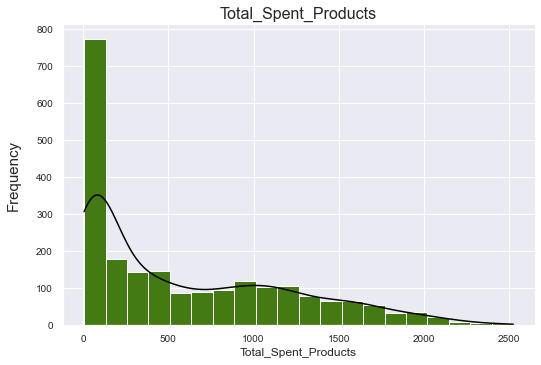

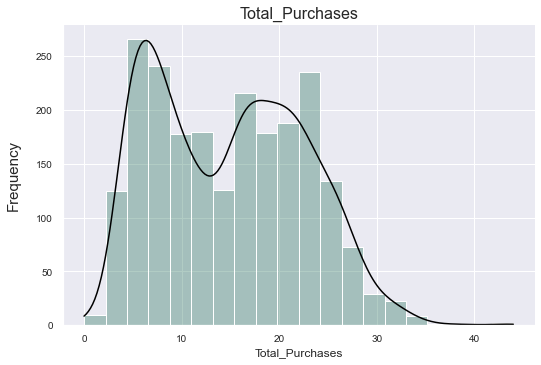

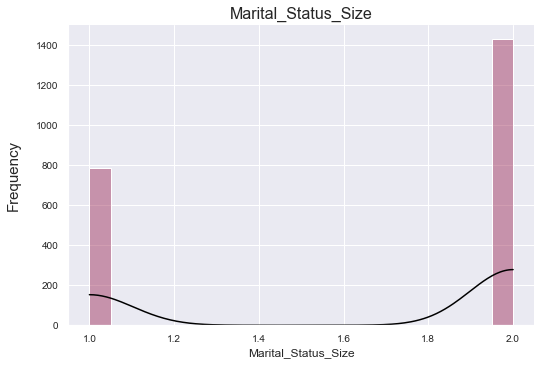

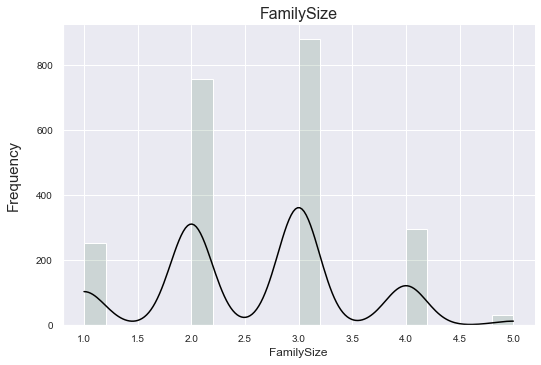

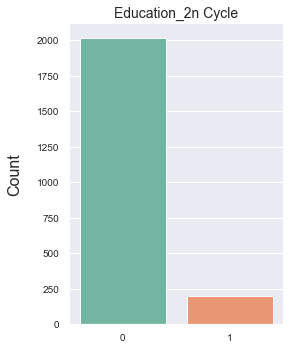

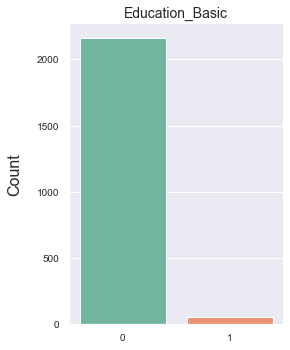

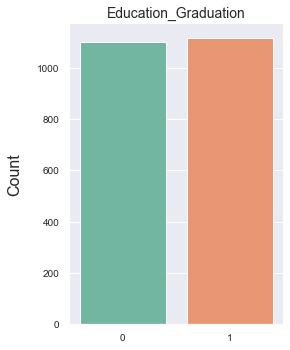

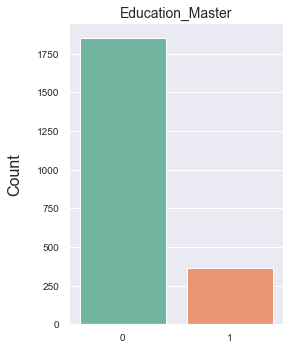

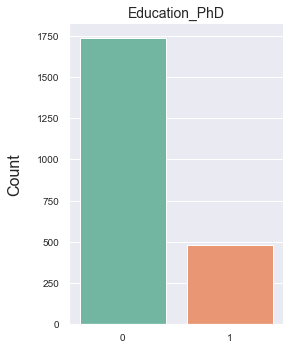

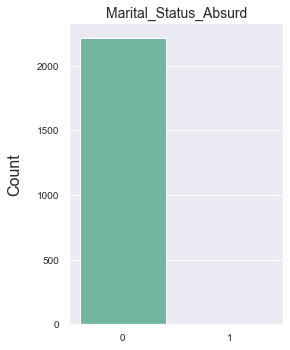

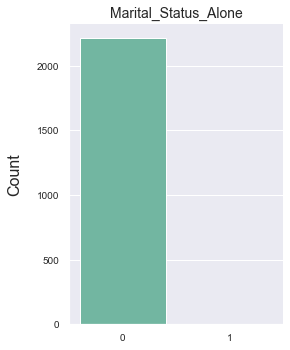

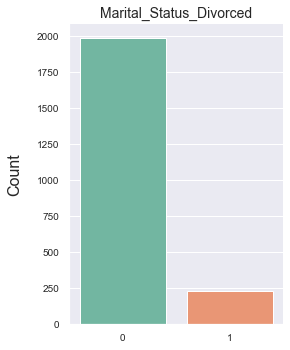

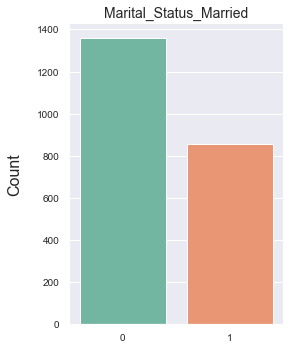

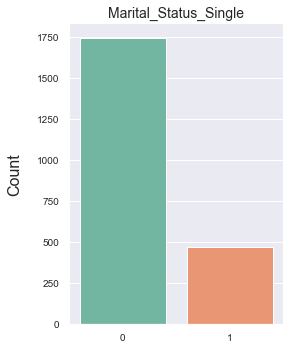

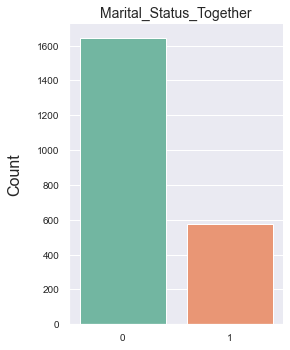

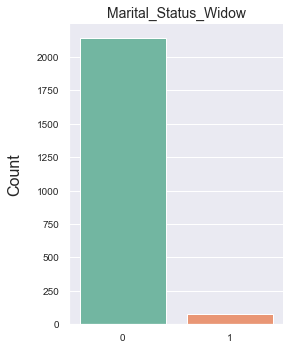

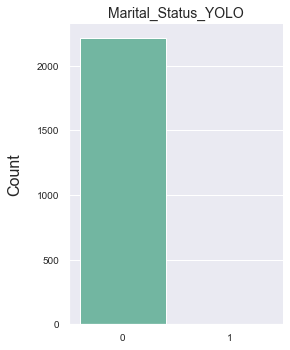

In [10]:
for i in range(1, len(customer_personality_unscaled.columns)):
    feat_histo(customer_personality_unscaled.iloc[:, i])

<Figure size 1080x576 with 0 Axes>

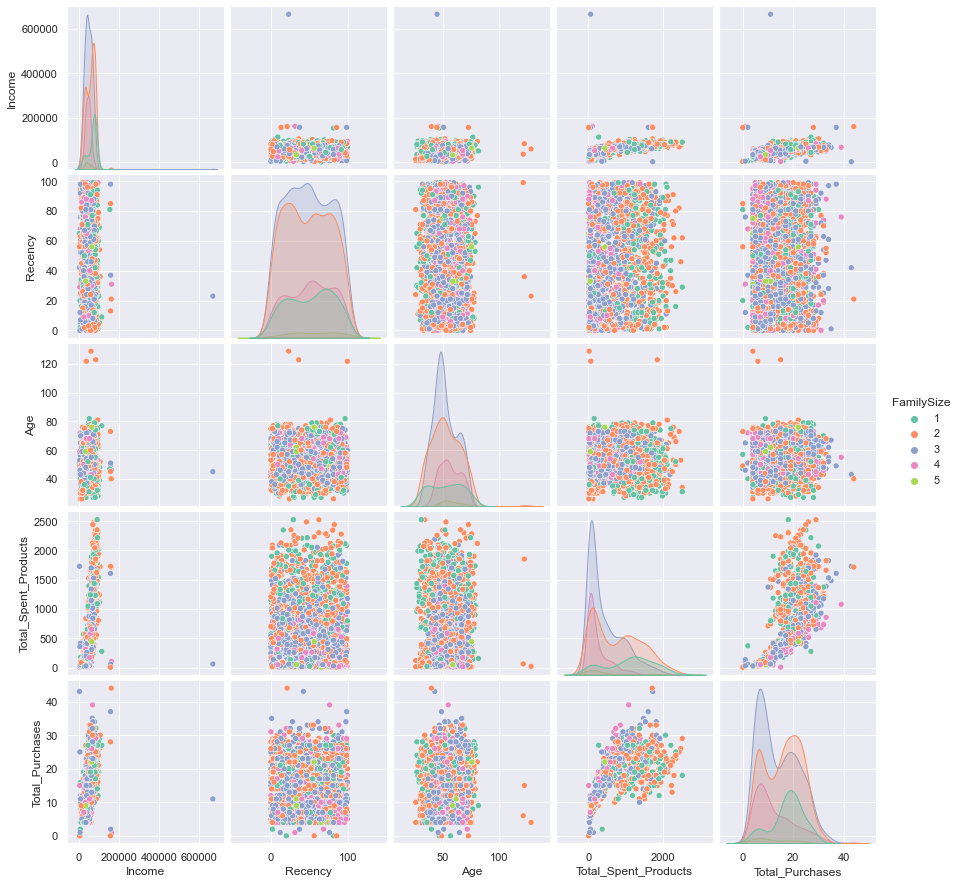

In [11]:
Features = ["Income", "Recency", "Age", "Total_Spent_Products", "FamilySize","Total_Purchases"]
plt.figure()
sns.pairplot(customer_personality_unscaled[Features], hue="FamilySize", palette="Set2")
plt.show()


In [12]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation=None, impute="drop",
                    n_factors=customer_personality.shape[1])
fa.fit(customer_personality)
ev, _ = fa.get_eigenvalues()
plt.scatter(range(1, customer_personality.shape[1]+1), ev,color = "Black")
plt.plot(range(1, customer_personality.shape[1]+1), ev)
plt.title('Plot')
plt.xlabel('Number of Factors')
plt.ylabel('Eigen Value')
plt.grid()


ModuleNotFoundError: No module named 'factor_analyzer'

In [ ]:
fa = FactorAnalyzer(n_factors=7,rotation='varimax')
fa.fit(customer_personality)
print(pd.DataFrame(fa.loadings_,index=customer_personality.columns))

In [ ]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

In [ ]:
print(pd.DataFrame(fa.get_communalities(),index=customer_personality.columns,columns=['Communalities']))